In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.style.use('fivethirtyeight')


In [2]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

/tmp/ipython-input-2-3605710231.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start=start, end = end)
[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [4]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-07-23,118754.960938,120113.351562,117391.390625,119997.445312,66608604537
2025-07-24,118368.000000,119535.453125,117247.968750,118770.984375,72627318560
2025-07-25,117635.882812,118486.976562,114759.820312,118368.000000,104857024569
2025-07-26,117947.367188,118335.687500,117181.226562,117644.843750,48508954046
2025-07-28,118107.492188,119788.843750,117984.101562,119443.953125,65759535104


In [5]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3967.0,2.372452e+04,2.791979e+04,1.781030e+02,2.319650e+03,1.013805e+04,3.785408e+04,1.199954e+05
High,BTC-USD,3967.0,2.419957e+04,2.841464e+04,2.117310e+02,2.418590e+03,1.032200e+04,3.909505e+04,1.230916e+05
Low,BTC-USD,3967.0,2.317228e+04,2.733959e+04,1.715100e+02,2.236595e+03,9.767173e+03,3.685360e+04,1.189592e+05
Open,BTC-USD,3967.0,2.369638e+04,2.788443e+04,1.768970e+02,2.321130e+03,1.013415e+04,3.783621e+04,1.199974e+05
Volume,BTC-USD,3967.0,2.006844e+10,2.143754e+10,5.914570e+06,9.601820e+08,1.613802e+10,3.141368e+10,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3967 entries, 2014-09-17 to 2025-07-28
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3967 non-null   float64
 1   (High, BTC-USD)    3967 non-null   float64
 2   (Low, BTC-USD)     3967 non-null   float64
 3   (Open, BTC-USD)    3967 non-null   float64
 4   (Volume, BTC-USD)  3967 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 186.0 KB


In [7]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
#Close price data
closing_price = stock_data[['Close']]

In [9]:
closing_price['Close']


Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-07-23,118754.960938
2025-07-24,118368.000000
2025-07-25,117635.882812


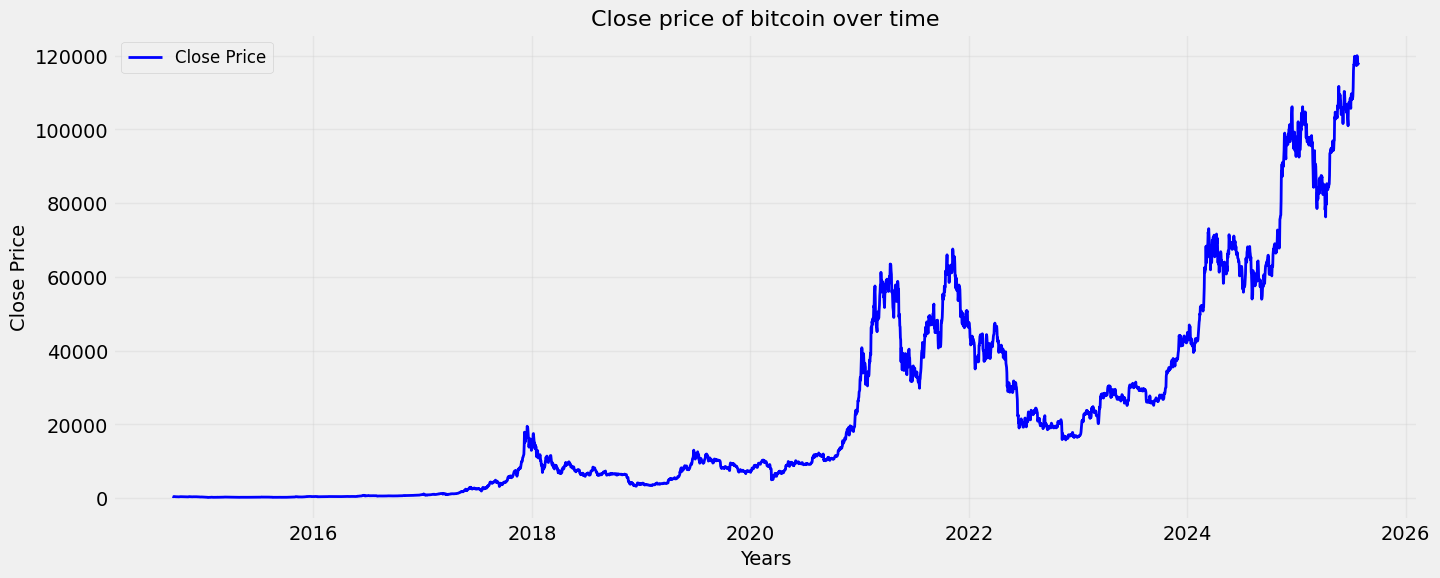

In [10]:
#Plot closing price with enchacement
closing_price = stock_data[['Close']]

plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

/tmp/ipython-input-11-194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
/tmp/ipython-input-11-194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


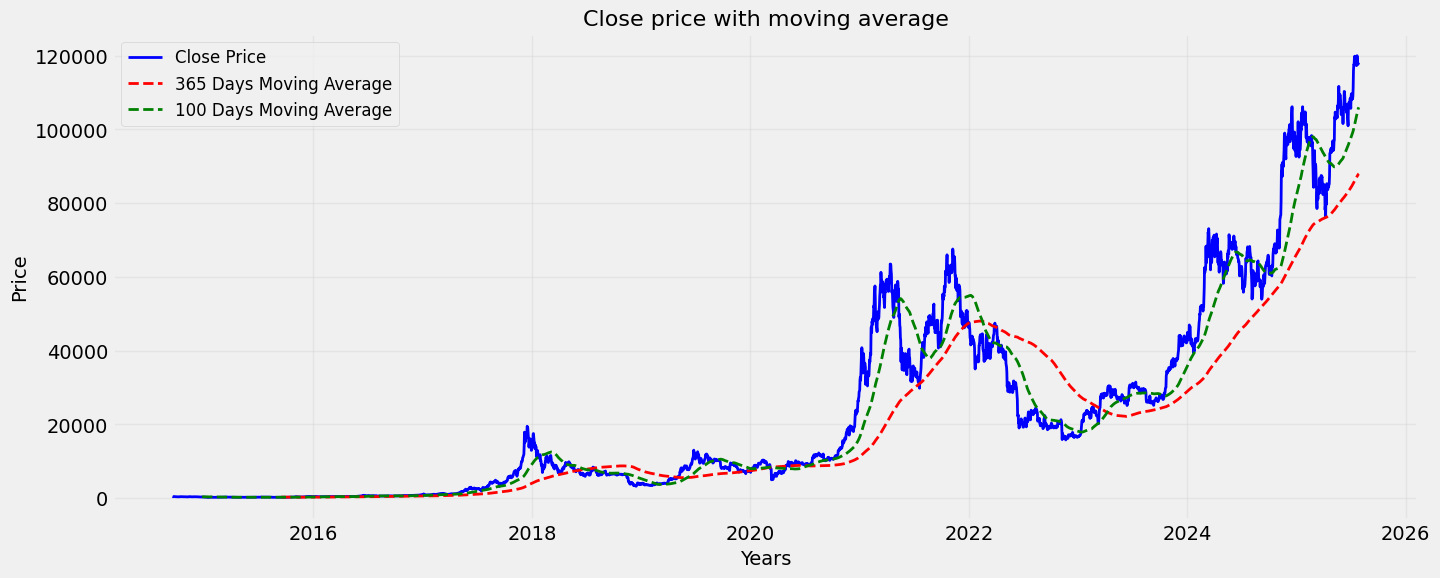

In [12]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [13]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [14]:
len(scaled_data)

3967

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [17]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [18]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - loss: 9.4480e-04
Epoch 2/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - loss: 2.2485e-04
Epoch 3/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - loss: 2.2672e-04
Epoch 4/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - loss: 1.4669e-04
Epoch 5/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - loss: 1.2020e-04
Epoch 6/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - loss: 1.7239e-04
Epoch 7/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - loss: 9.0315e-05
Epoch 8/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - loss: 1.2090e-04
Epoch 9/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - loss: 1.0671e-04
Epoch 10/10
696/696 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - loss: 1.0105e-04


In [20]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [21]:
rmse = np.sqrt(mean_squared_error(inv_y_test, inv_predictions))
mae = mean_absolute_error(inv_y_test, inv_predictions)
r2 = r2_score(inv_y_test, inv_predictions)

print(f" RMSE: {rmse:.2f}")
print(f" MAE: {mae:.2f}")
print(f" R² Score: {r2:.4f}")


 RMSE: 2117.95
 MAE: 1533.57
 R² Score: 0.9869


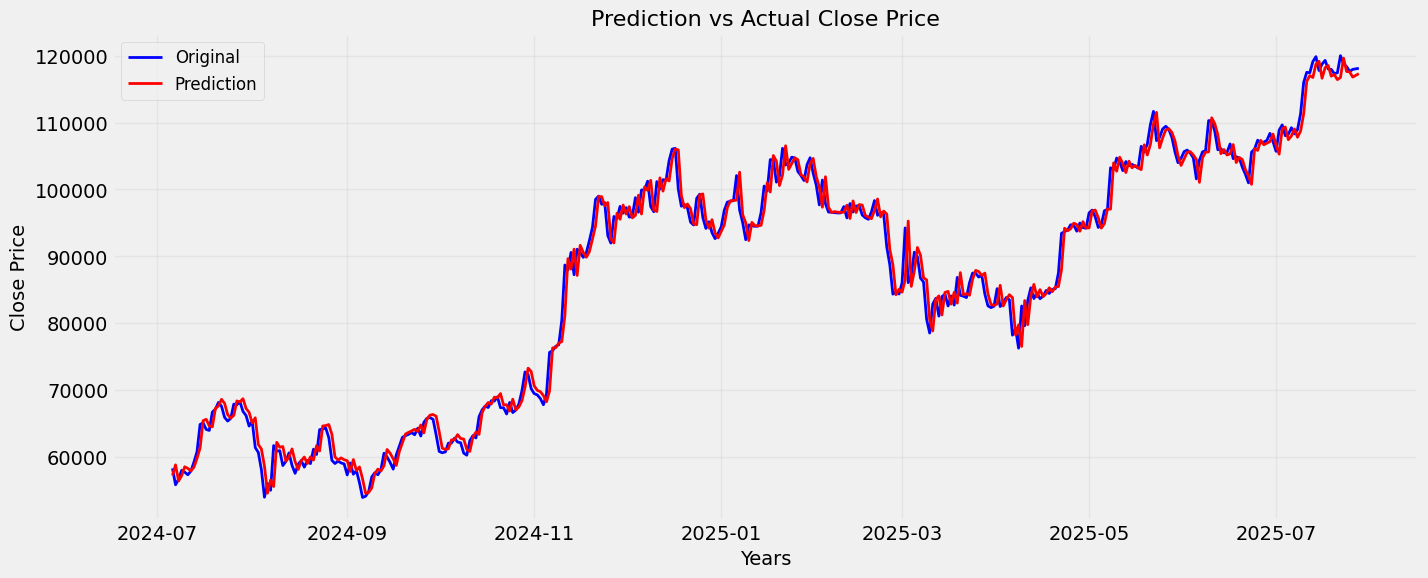

In [22]:
plotting_data = pd.DataFrame({
    'Original': inv_y_test.flatten(),
    'Prediction': inv_predictions.flatten(),
}, index=closing_price.index[train_size + base_days:])

plt.figure(figsize=(15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label='Original', color='blue', linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label='Prediction', color='red', linewidth=2)
plt.title("Prediction vs Actual Close Price", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


In [23]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [24]:
future_predictions

[array([[117394.62]], dtype=float32),
 array([[116549.88]], dtype=float32),
 array([[115750.62]], dtype=float32),
 array([[115001.61]], dtype=float32),
 array([[114293.43]], dtype=float32),
 array([[113623.125]], dtype=float32),
 array([[112991.055]], dtype=float32),
 array([[112397.81]], dtype=float32),
 array([[111843.05]], dtype=float32),
 array([[111325.195]], dtype=float32)]

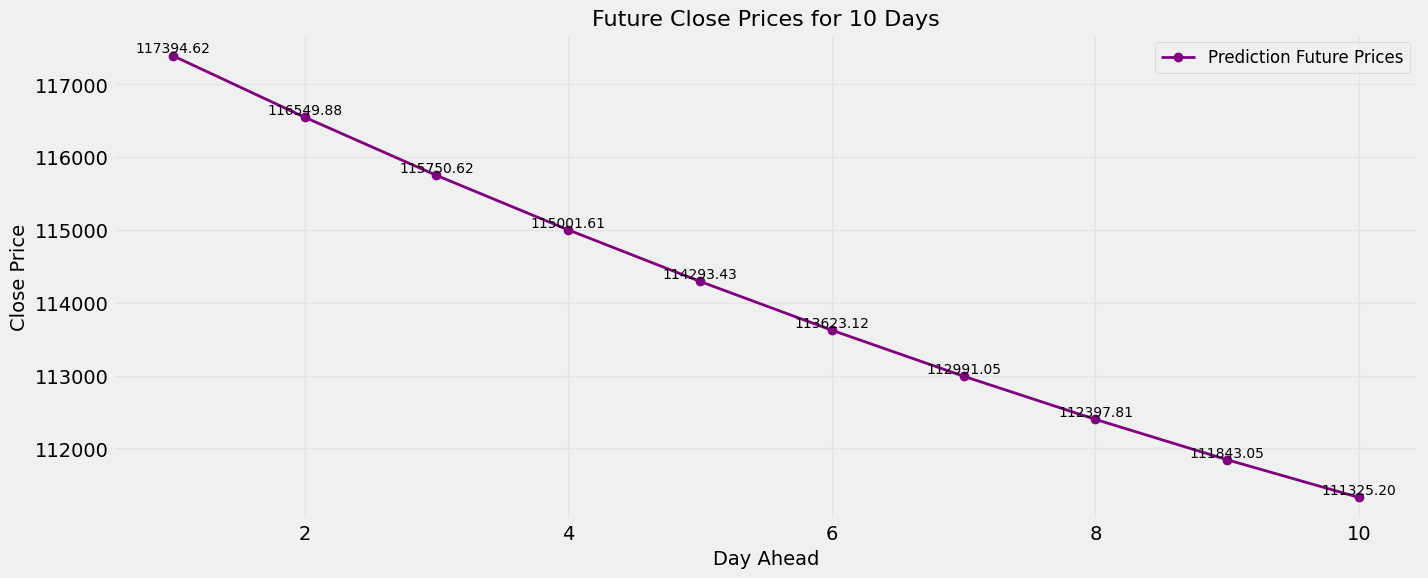

In [25]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [26]:
model.save("model.keras")

 Enter number of future days to predict: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


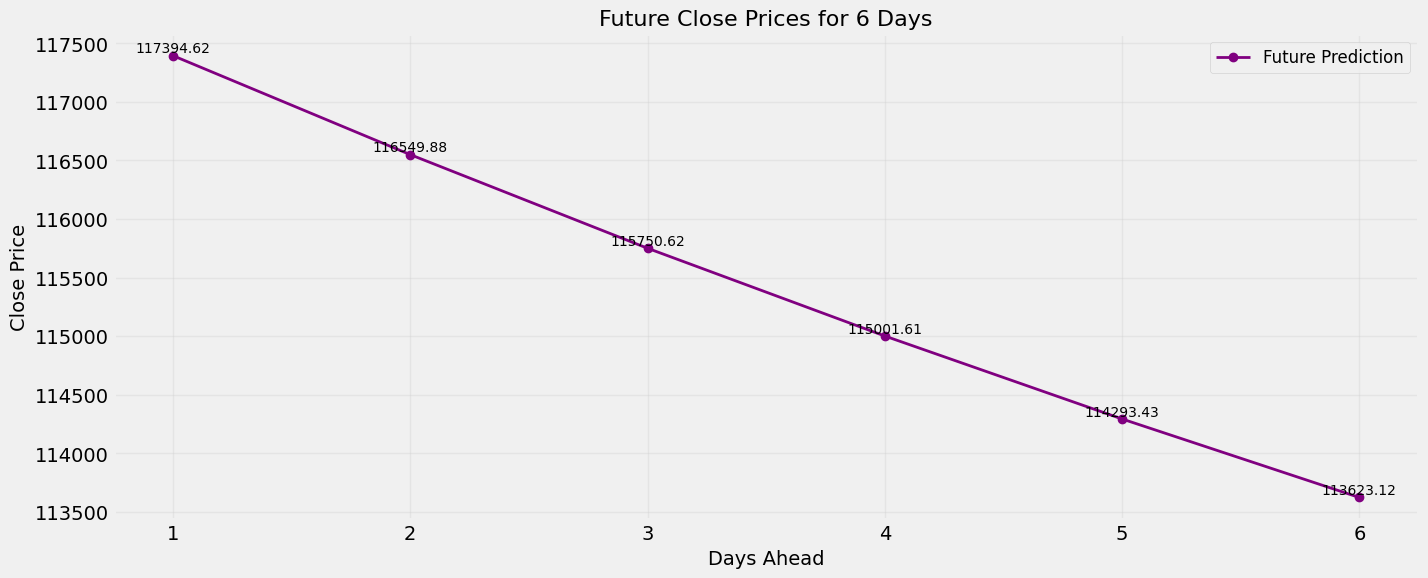

array([117394.62 , 116549.88 , 115750.62 , 115001.61 , 114293.43 ,
       113623.125], dtype=float32)

In [33]:
def predict_future_prices_interactive():
    try:
        days = int(input(" Enter number of future days to predict: "))
        if days <= 0:
            print(" Please enter a positive number.")
            return

        last_100 = scaled_data[-100:].reshape(1, -1, 1)
        future_predictions = []

        for _ in range(days):
            next_day = model.predict(last_100)
            future_predictions.append(scaler.inverse_transform(next_day)[0][0])
            last_100 = np.append(last_100[:, 1:, :], next_day.reshape(1, 1, -1), axis=1)

        future_predictions = np.array(future_predictions)

        plt.figure(figsize=(15, 6))
        plt.plot(range(1, days+1), future_predictions, marker="o", label='Future Prediction', color='purple', linewidth=2)

        for i, val in enumerate(future_predictions):
            plt.text(i+1, val, f'{val:.2f}', fontsize=10, ha='center', va='bottom', color='black')

        plt.title(f"Future Close Prices for {days} Days", fontsize=16)
        plt.xlabel("Days Ahead", fontsize=14)
        plt.ylabel("Close Price", fontsize=14)
        plt.grid(alpha=0.3)
        plt.legend(fontsize=12)
        plt.show()

        return future_predictions

    except ValueError:
        print(" Invalid input. Please enter an integer.")

# Call it like this:
predict_future_prices_interactive()
